In [2]:
!pip install statsmodels 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
plt.rcParams["figure.figsize"] = (12,6)

In [4]:
df = pd.read_csv("Course Data/macrodata.csv", index_col=0, parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<Axes: >

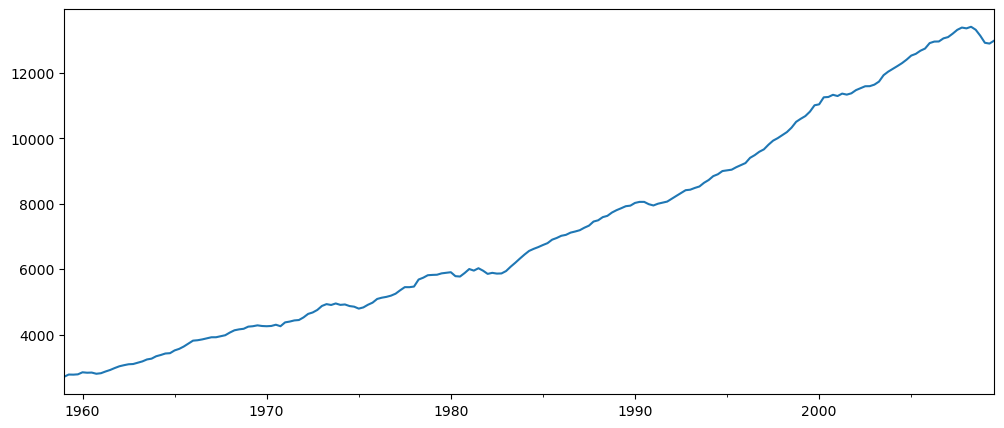

In [21]:
df["realgdp"].plot(figsize=(12,5))

In [22]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [26]:
gdp_cycle, gdp_trend = hpfilter(df["realgdp"], lamb=1600)
df["trend"] = gdp_trend; df["cycle"] = gdp_cycle

<Axes: >

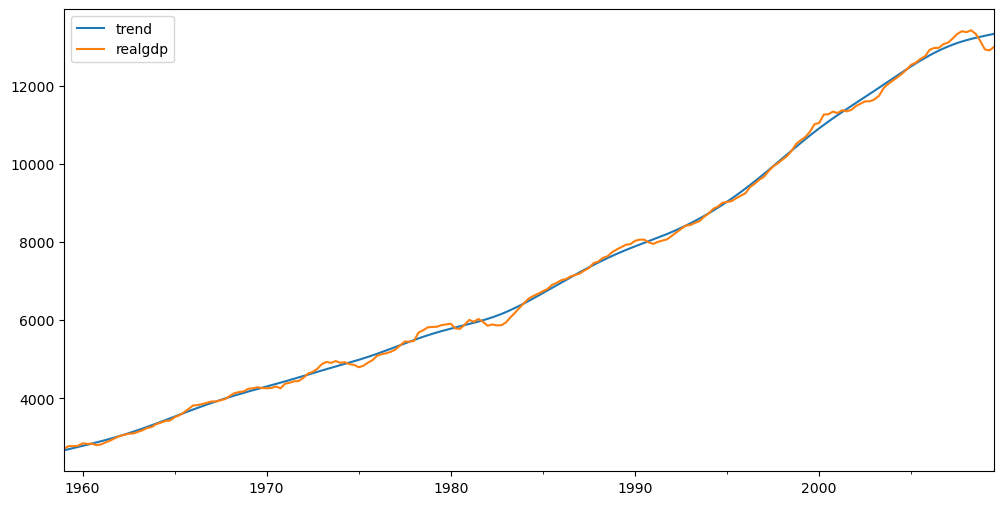

In [28]:
df[["trend", "realgdp"]].plot()

In [32]:
airline = pd.read_csv("Course Data/airline_passengers.csv", index_col="Month", parse_dates=True)
airline = airline.dropna()
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

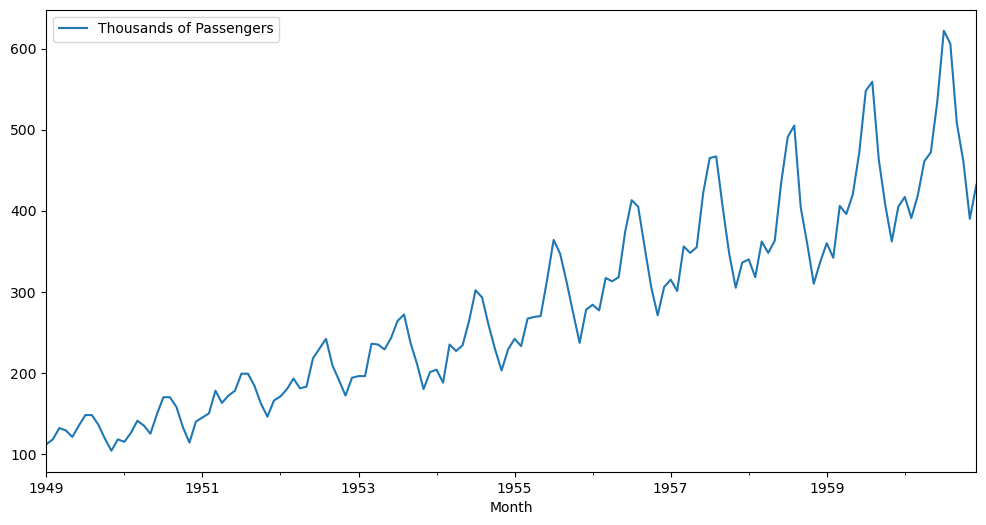

In [33]:
airline.plot()

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
result = seasonal_decompose(airline["Thousands of Passengers"], model="multiplicative")

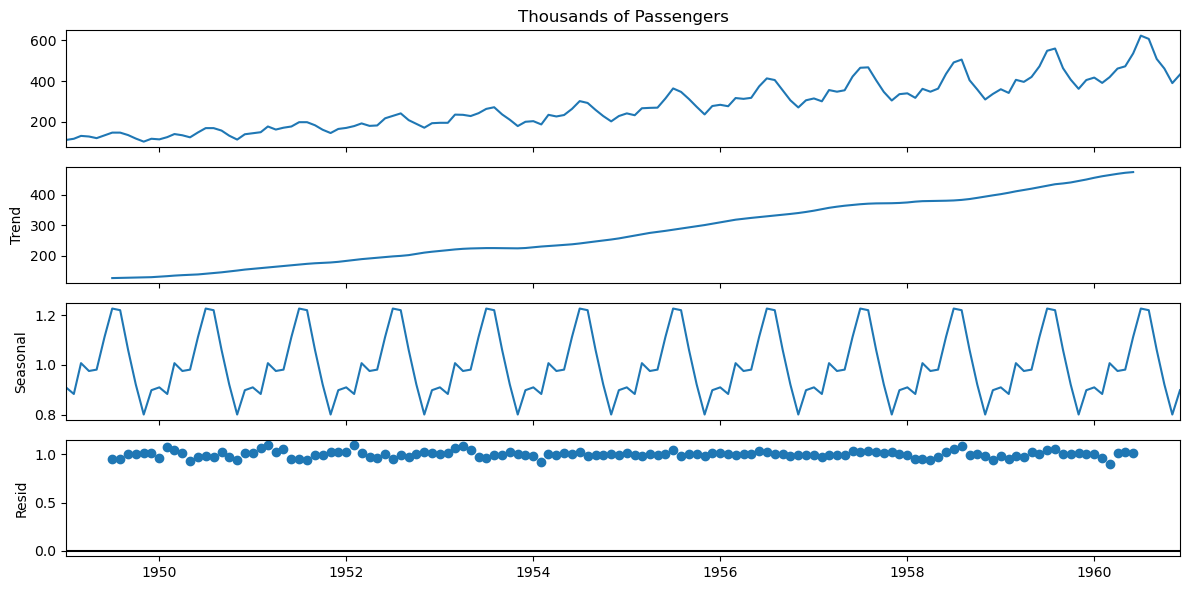

In [43]:
result.plot();

## EWMA

In [45]:
airline["6m-sma"] = airline["Thousands of Passengers"].rolling(window=6).mean() 
airline["12m-sma"] = airline["Thousands of Passengers"].rolling(window=12).mean() 

<Axes: xlabel='Month'>

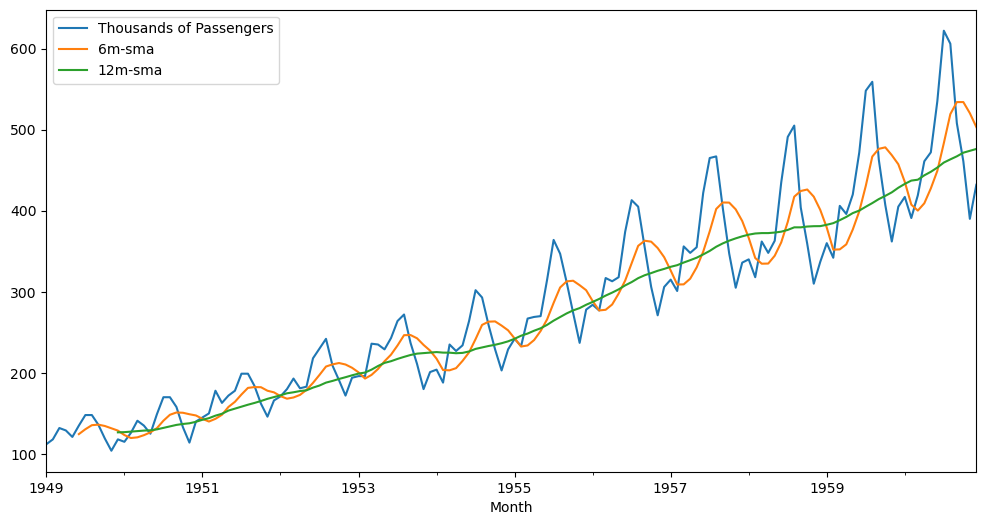

In [46]:
airline.plot()

In [47]:
airline["ewma-12"] = airline["Thousands of Passengers"].ewm(span=12).mean()

<Axes: xlabel='Month'>

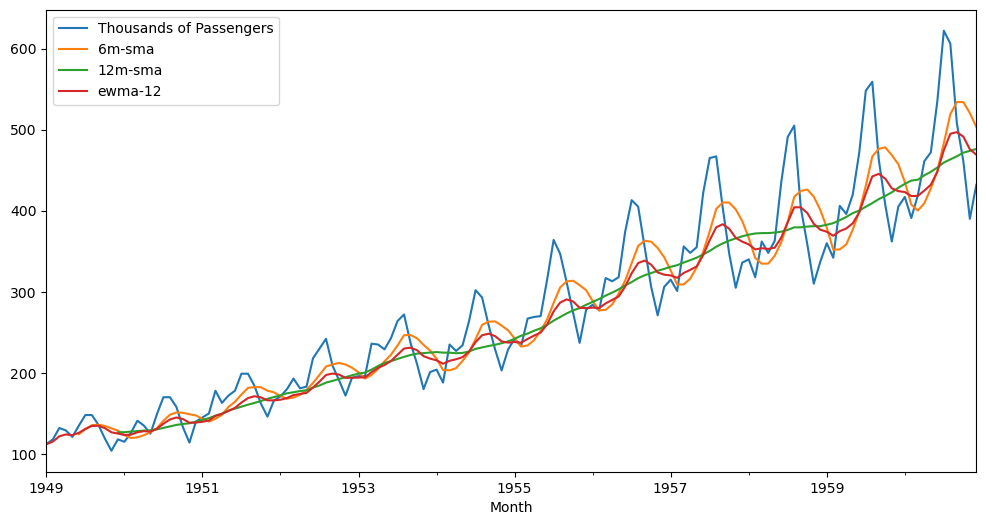

In [50]:
airline.plot()

## Holt-Winters Method

In [51]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [54]:
airline.index.freq = "MS"
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [57]:
span = 12
alpha = 2/(span + 1)

In [66]:
airline["EWMA12"] = airline["Thousands of Passengers"].ewm(alpha=alpha, adjust=False).mean()

In [67]:
model = SimpleExpSmoothing(airline["Thousands of Passengers"])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [68]:
airline["SES12"] = fitted_model.fittedvalues.shift(-1)

In [69]:
airline

,Thousands of Passengers,6m-sma,12m-sma,ewma-12,EWMA12,SES12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861
...,...,...,...,...,...,...
1960-08-01,606,519.166667,463.333333,494.898620,494.898619,494.898619
1960-09-01,508,534.000000,467.083333,496.914217,496.914216,496.914216
1960-10-01,461,534.000000,471.583333,491.388952,491.388952,491.388952


In [70]:
# Holt Method

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [72]:
airline["DES_add_12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="add").fit().fittedvalues.shift(-1)

<Axes: xlabel='Month'>

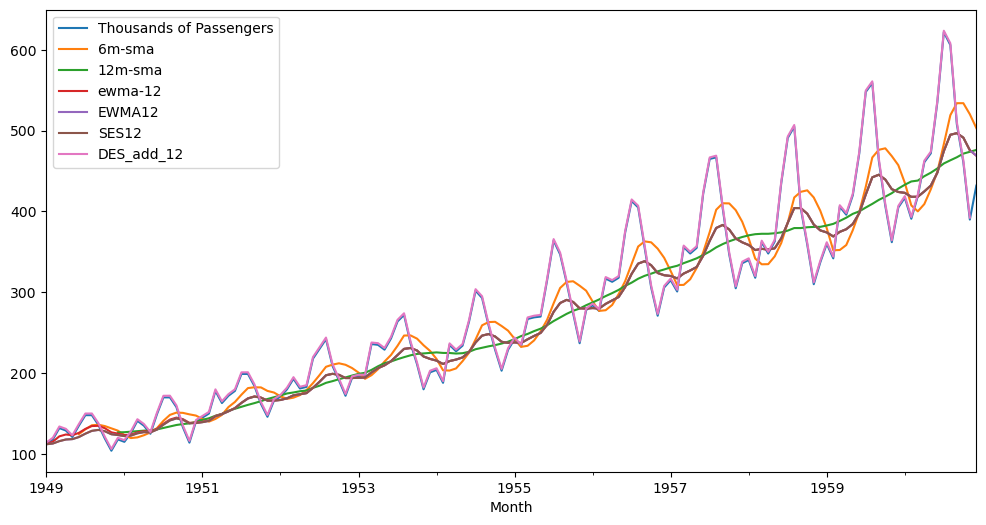

In [73]:
airline.plot()

In [74]:
# Holt - Winters Method

In [80]:
airline["TES_mul_12"] = ExponentialSmoothing(
    airline["Thousands of Passengers"], 
    trend    = "mul", 
    seasonal = "mul",
    seasonal_periods = 12).fit().fittedvalues # Do not shift

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

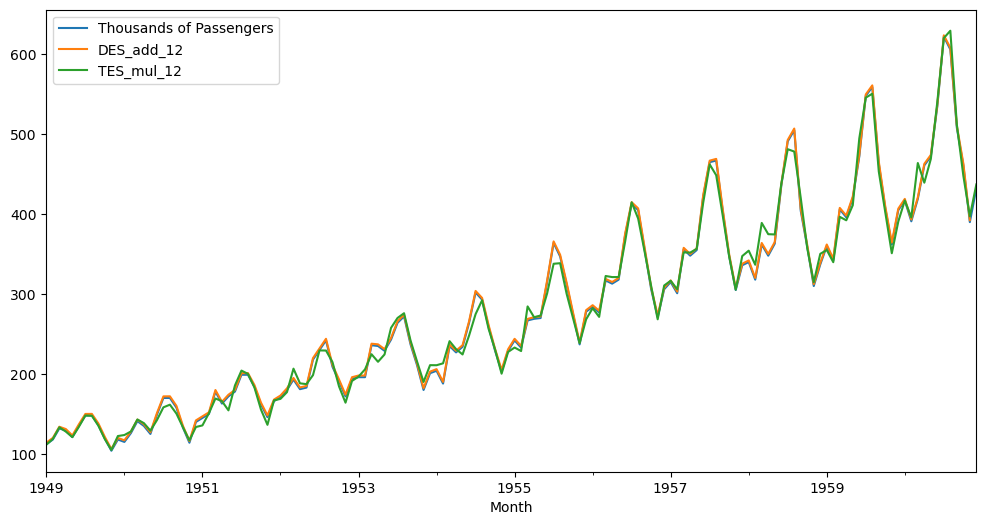

In [84]:
airline[["Thousands of Passengers", "DES_add_12", "TES_mul_12"]].plot()

## Forecast

In [96]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    int64  
 1   6m-sma                   139 non-null    float64
 2   12m-sma                  133 non-null    float64
 3   ewma-12                  144 non-null    float64
 4   EWMA12                   144 non-null    float64
 5   SES12                    143 non-null    float64
 6   DES_add_12               143 non-null    float64
 7   TES_mul_12               144 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 10.1 KB


In [85]:
train_data = airline.iloc[:109]
test_data  = airline.iloc[108:]

In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [108]:
fitted_model = ExponentialSmoothing(
    train_data["Thousands of Passengers"],
    trend="mul",
    seasonal="mul",
    seasonal_periods=12).fit()

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [109]:
test_predictions = fitted_model.forecast(36)

<Axes: xlabel='Month'>

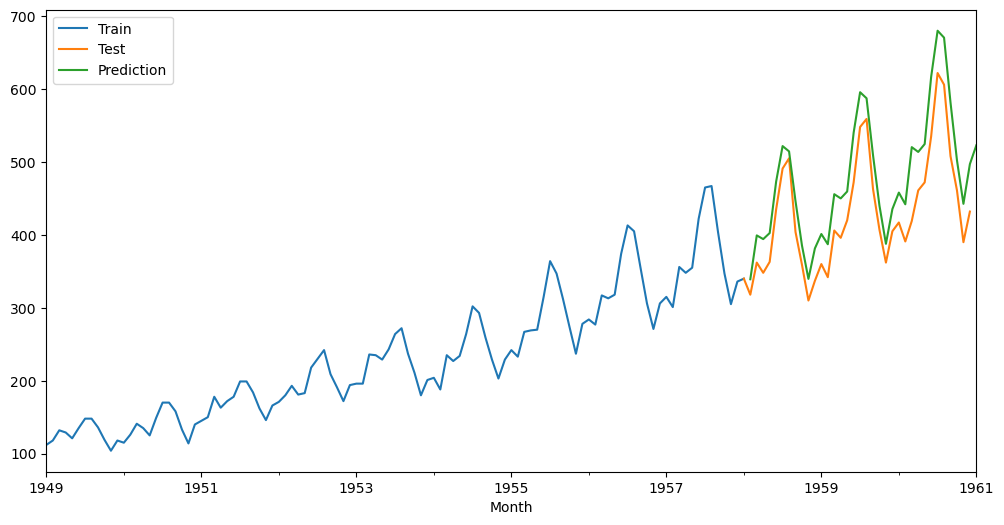

In [110]:
train_data["Thousands of Passengers"].plot(legend="True", label="Train")
test_data["Thousands of Passengers"].plot(legend="True", label="Test")
test_predictions.plot(legend="True", label="Prediction")